In [5]:
import pandas as pd
path = "/Users/christyhe/Documents/revenue_projection/"

In [6]:
#Extract revenue data from tblADCrevenue_projection table

header = ['Year', 'Month', 'Adsystem Revenue']
df_revenue = pd.read_csv(
    path + 'revenue_projection_all.csv',
    sep=',',
    usecols=range(3),
    names=header)
df_revenue.head()

Year  Month  Adsystem Revenue
0  2016      1          71931523
1  2016      2          76668397
2  2016      3          85017959
3  2016      4          84890744
4  2016      5          88048143

In [7]:
#Revenue projection 2018
df_revenue.shape

(48, 3)

Daily Advertiser Traffic 2018-01-01 to 2018-06-01

In [8]:
#Extract revenue data from tblADCdaily_advertiser_traffic for 2018

header = ['cost_millicents', 'rez_cost_millicents', 'month', 'year']
df_daily_adv_2018 = pd.read_csv(
    "/Users/christyhe/Documents/revenue_projection/daily_advertiser_traffic_revenue_2018.csv",
    sep=',',
    names=header)
df_daily_adv_2018.head()

cost_millicents  rez_cost_millicents  month  year
0   17830067795028         212920176266      1  2018
1   18734854653189         203256999476      2  2018
2   20506602372605         129940014234      3  2018
3   20575759222220          14223935961      4  2018
4   21275933540769          16751559997      5  2018

In [41]:
#2018 daily advertiser traffic
df_daily_adv_2018.shape

(6, 4)

Daily Advertiser Traffic 2012-01-01 to 2018-06-01

In [24]:
#Extract all revenue data from tblADCdaily_advertiser_traffic 
header = ['cost_millicents', 'rez_cost_millicents', 'month', 'year']
df_daily_adv_all = pd.read_csv(
    path + "daily_adv_traffic_2012_2018.csv",
    sep=',',
    names=header)
df_daily_adv_all.head()

cost_millicents  rez_cost_millicents  month  year
0     865396499000                    0      1  2012
1    1434811771251           5961500000      1  2013
2    2666430519711          13034959004      1  2014
3    4274672754580          25506429367      1  2015
4    7164813276319          70297708801      1  2016

In [10]:
df_daily_adv_all.shape

(78, 4)

Extract Credit Spend Data from tblADCcredit_spend table
header = ['activity_date', 'credit_id', 'advertiser_id', 'cost_jobsearch_local', 'cost_jobsearch_millicents', 'clicks', 'currency']

header = [
    'activity_date', 'credit_id', 'advertiser_id', 'cost_jobsearch_local',
    'cost_jobsearch_millicents', 'clicks', 'currency'
]
df_credit = pd.read_csv(
    "/Users/christyhe/Documents/revenue_projection/credit_spend_2018.csv",
    sep='\t',
names = header)
df_credit.head()

In [25]:
#Extract all revenue data from tblADCcredit_spend
header = ['cost_jobsearch_millicents', 'month', 'year']
df_credit_spend_all = pd.read_csv(
    path + "credit_spend_2012_2018.csv",
    sep=',',
    names=header)
df_credit_spend_all.head()

cost_jobsearch_millicents  month  year
0                24049928647      1  2013
1                69901507206      1  2014
2                96183759040      1  2015
3                41593637008      1  2016
4               111206321450      1  2017

In [26]:
df_credit_spend_all.shape

(76, 3)

In [27]:
df_all = df_daily_adv_all.merge(df_credit_spend_all)
df_all.head()

cost_millicents  rez_cost_millicents  month  year  \
0    1434811771251           5961500000      1  2013   
1    2666430519711          13034959004      1  2014   
2    4274672754580          25506429367      1  2015   
3    7164813276319          70297708801      1  2016   
4   10900417301673         147430166982      1  2017   

   cost_jobsearch_millicents  
0                24049928647  
1                69901507206  
2                96183759040  
3                41593637008  
4               111206321450

In [47]:
#join credit with raw revenue into one data frame
df_all['year_month'] = [str(y) + '-' + str(x) for x, y in zip(df_all.month, df_all.year)]
df_all['total_revenue'] = df_all.cost_millicents + df_all.rez_cost_millicents - df_all.cost_jobsearch_millicents
df_all.head()

cost_millicents  rez_cost_millicents  month  year  \
0    1434811771251           5961500000      1  2013   
1    2666430519711          13034959004      1  2014   
2    4274672754580          25506429367      1  2015   
3    7164813276319          70297708801      1  2016   
4   10900417301673         147430166982      1  2017   

   cost_jobsearch_millicents year_month   total_revenue  
0                24049928647     2013-1   1416723342604  
1                69901507206     2014-1   2609563971509  
2                96183759040     2015-1   4203995424907  
3                41593637008     2016-1   7193517348112  
4               111206321450     2017-1  10936641147205

In [48]:
df_all_final = df_all[["year_month", "total_revenue"]]
df_all_final.head()

year_month   total_revenue
0     2013-1   1416723342604
1     2014-1   2609563971509
2     2015-1   4203995424907
3     2016-1   7193517348112
4     2017-1  10936641147205

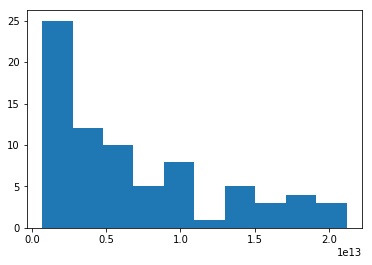

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df_all_final.total_revenue)
plt.show()

In [34]:
# Resume Subscription Revenue
# total_daily_amount_millicents,
#   SUM(daily_promotion_millicents) as total_daily_credit_millicents
header = ['total_daily_amount_millicents', 'total_daily_credit_millicents', 'month', 'year']
df_resume_sub_all = pd.read_csv(
    path + "resume_subscription_all.csv",
    sep=',',
    names=header)
df_resume_sub_all.head()

total_daily_amount_millicents  total_daily_credit_millicents  month  year
0                      388848501                              0   2018     1
1                     2407158029                              0   2018     2
2                   100432028630                     2891838527   2018     3
3                   461671445149                    22504961320   2018     4
4                   629400465494                    34164599401   2018     5

In [37]:
df_resume_sub_all['year_month'] = [(y, x) for x, y in zip( df_resume_sub_all.year, df_resume_sub_all.month,)]
df_resume_sub_all['total_revenue'] = df_resume_sub_all.total_daily_amount_millicents - df_resume_sub_all.total_daily_credit_millicents
df_resume_sub_all.head()

total_daily_amount_millicents  total_daily_credit_millicents  month  year  \
0                      388848501                              0   2018     1   
1                     2407158029                              0   2018     2   
2                   100432028630                     2891838527   2018     3   
3                   461671445149                    22504961320   2018     4   
4                   629400465494                    34164599401   2018     5   

  year_month  total_revenue  
0  (2018, 1)      388848501  
1  (2018, 2)     2407158029  
2  (2018, 3)    97540190103  
3  (2018, 4)   439166483829  
4  (2018, 5)   595235866093